In [15]:
import cryptocompare
import urllib.request
import pandas as pd
import json
import numpy as np
import datetime
import time
import os
from pathlib import Path

import requests
# import time
# import datetime
# import typing
# import os
from typing import Union, Optional, List, Dict
Timestamp = Union[datetime.datetime, datetime.date, int, float]

In [14]:
cryptocompare.cryptocompare._set_api_key_parameter("2505dbe622f0828b75b9fce3b24781f35bd23b25e6cf0ca4b118d76a9bb9e6aa")

'&api_key=2505dbe622f0828b75b9fce3b24781f35bd23b25e6cf0ca4b118d76a9bb9e6aa'

In [16]:
# API
# _API_KEY_PARAMETER = ""
# _URL_COIN_LIST = 'https://www.cryptocompare.com/api/data/coinlist?'
# _URL_PRICE = 'https://min-api.cryptocompare.com/data/pricemulti?fsyms={}&tsyms={}'
# _URL_PRICE_MULTI = 'https://min-api.cryptocompare.com/data/pricemulti?fsyms={}&tsyms={}'
# _URL_PRICE_MULTI_FULL = 'https://min-api.cryptocompare.com/data/pricemultifull?fsyms={}&tsyms={}'
_URL_HIST_PRICE = 'https://min-api.cryptocompare.com/data/pricehistorical?fsym={}&tsyms={}&ts={}&e={}'
_URL_HIST_PRICE_DAY = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&e={}&toTs={}'
_URL_HIST_PRICE_HOUR = 'https://min-api.cryptocompare.com/data/histohour?fsym={}&tsym={}&limit={}&e={}&toTs={}'
# _URL_HIST_PRICE_MINUTE = 'https://min-api.cryptocompare.com/data/histominute?fsym={}&tsym={}&limit={}&e={}&toTs={}'
# _URL_AVG = 'https://min-api.cryptocompare.com/data/generateAvg?fsym={}&tsym={}&e={}'
# _URL_EXCHANGES = 'https://www.cryptocompare.com/api/data/exchanges?'
# _URL_PAIRS = 'https://min-api.cryptocompare.com/data/pair/mapping/exchange?e={}'

# DEFAULTS
CURRENCY = 'USD'
LIMIT = 1440

In [18]:

def _query_cryptocompare(url: str, errorCheck: bool = True, api_key: str = None) -> Optional[Dict]:
    """
    Query the url and return the result or None on failure.
    :param url: the url
    :param errorCheck: run extra error checks (default: True)
    :returns: respones, or nothing if errorCheck=True
    :api_key: optional, if you want to add an API Key
    """
    api_key_parameter = _set_api_key_parameter(api_key)
    try:
        response = requests.get(url + api_key_parameter).json()
    except Exception as e:
        print('Error getting coin information. %s' % str(e))
        return None
    if errorCheck and (response.get('Response') == 'Error'):
        print('[ERROR] %s' % response.get('Message'))
        return None
    return response


def _format_parameter(parameter: object) -> str:
    """
    Format the parameter depending on its type and return
    the string representation accepted by the API.
    :param parameter: parameter to format
    """
    if isinstance(parameter, list):
        return ','.join(parameter)

    else:
        return str(parameter)


def _format_timestamp(timestamp: Timestamp) -> int:
    """
    Format the timestamp depending on its type and return
    the integer representation accepted by the API.
    :param timestamp: timestamp to format
    """
    if isinstance(timestamp, datetime.datetime) or isinstance(timestamp, datetime.date):
        return int(time.mktime(timestamp.timetuple()))
    return int(timestamp)


def _set_api_key_parameter(api_key: str = None) -> str:
    if api_key is None:
        api_key = os.getenv('CRYPTOCOMPARE_API_KEY')
    if api_key is not None:
        _API_KEY = "&api_key={}".format(api_key)
        return _API_KEY
    return ""

In [19]:

def get_historical_price(coin: str, currency: str = CURRENCY, timestamp: Timestamp = time.time(),
                         exchange: str = 'CCCAGG') -> Optional[Dict]:
    """
    Get the price of a coin in a given currency during a specific time.
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param timestamp: point in time
    :param exchange: the exchange to use
    :returns: dict of coin and currency price pairs
    """
    return _query_cryptocompare(
        _URL_HIST_PRICE.format(coin,
                               _format_parameter(currency),
                               _format_timestamp(timestamp),
                               _format_parameter(exchange))
    )


def get_historical_price_day(coin: str, currency: str = CURRENCY, limit: int = LIMIT,
                             exchange: str = 'CCCAGG', toTs: Timestamp = time.time()) -> Optional[Dict]:
    """
    Get historical price (day).
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param limit: number of data points (max. 2000)
    :param exchange: exchange to use (default: 'CCCAGG')
    :param toTs: return data before this timestamp. (Unix epoch time or datetime object)
    :returns: dict of coin and currency price pairs
    """
    response = _query_cryptocompare(
        _URL_HIST_PRICE_DAY.format(coin, _format_parameter(currency), limit, exchange, _format_timestamp(toTs)))
    if response:
        return response['Data']
    return None


def get_historical_price_hour(coin: str, currency: str = CURRENCY, limit: int = LIMIT,
                              exchange: str = 'CCCAGG', toTs: Timestamp = time.time()) -> Optional[Dict]:
    """
    Get historical price (hourly).
    :param coin: symbolic name of the coin (e.g. BTC)
    :param currency: short hand description of the currency (e.g. EUR)
    :param limit: number of data points (max. 2000)
    :param exchange: exchange to use (default: 'CCCAGG')
    :param toTs: return data before this timestamp. (Unix epoch time or datetime object)
    :returns: dict of coin and currency price pairs
    """
    response = _query_cryptocompare(
        _URL_HIST_PRICE_HOUR.format(coin, _format_parameter(currency), limit, exchange, _format_timestamp(toTs)))
    if response:
        return response['Data']
    return None


In [20]:
path = Path(f'{os.getcwd()}')
file = open(f"{path}\current_crypto.txt", "a+")

df = cryptocompare.get_historical_price_hour('DOGE', currency='USD')

In [48]:
# Comvert df to dataframe and save to csv
df = pd.DataFrame(df)
df.to_csv(f"{path}\current_crypto.csv")

                    time    high     low    open   volumefrom    volumeto  \
0    2021-12-23 12:00:00  0.1773  0.1752  0.1756   9247792.92  1633539.76   
1    2021-12-23 13:00:00  0.1779  0.1764  0.1764   6310294.05  1118300.86   
2    2021-12-23 14:00:00  0.1774  0.1757  0.1771   6428214.96  1134577.36   
3    2021-12-23 15:00:00  0.1777  0.1763  0.1764   8064412.15  1427506.12   
4    2021-12-23 16:00:00  0.1788  0.1759  0.1768  12220874.51  2166635.69   
...                  ...     ...     ...     ...          ...         ...   
1436 2022-02-21 08:00:00  0.1419  0.1397  0.1408  16082209.71  2267489.69   
1437 2022-02-21 09:00:00  0.1399  0.1387  0.1398   5368530.12   748851.58   
1438 2022-02-21 10:00:00  0.1392  0.1373  0.1390   6476132.18   893689.01   
1439 2022-02-21 11:00:00  0.1381  0.1340  0.1377  37647786.28  5103222.91   
1440 2022-02-21 12:00:00  0.1360  0.1342  0.1351  17797950.80  2406256.94   

       close conversionType conversionSymbol  
0     0.1764         direct 

In [55]:
# Read csv file in new_df
new_df = pd.read_csv(f"{path}\current_crypto.csv")

In [60]:
# Create new dataframe to hold only the time and close column
new_df = new_df[['time', 'close']]
#Create new column for coin_type = DOGE
new_df['coin_type'] = 'DOGE'

# Filter data between two dates 
filtered_df = new_df.loc[(new_df['time'] >= '2022-01-12') & (new_df['time'] <= '2022-01-17')]

In [61]:
print(filtered_df.head())

                    time   close coin_type
468  2022-01-12 00:00:00  0.1538      DOGE
469  2022-01-12 01:00:00  0.1534      DOGE
470  2022-01-12 02:00:00  0.1524      DOGE
471  2022-01-12 03:00:00  0.1532      DOGE
472  2022-01-12 04:00:00  0.1531      DOGE


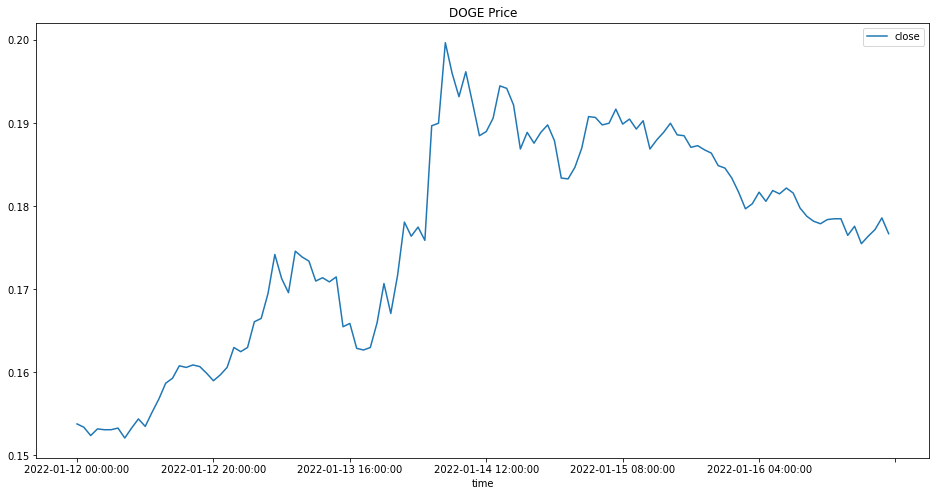

In [62]:
# Plot the dataframe time and close price between Jan 10, 2022, and Jan 15, 2022
from matplotlib import pyplot as plt

filtered_df.plot(x='time', y='close', figsize=(16, 8), title='DOGE Price')
plt.show()

In [63]:
# Save DOGE price from filtered_df to a csv file
filtered_df.to_csv(f"{path}\DOGE_price.csv")